In [4]:
!pip install --quiet -U langgraph typing


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [194]:
from typing import List, Annotated
from typing_extensions import TypedDict
from operator import add

class State(TypedDict):
    graph_state : str
    node_ran: List[int]
    t: Annotated[List[str],add]

**Define the Node**

In [195]:
def node_1(state: State):
    print("--Node 1--")
    new_node_ran = state.get("node_ran",[]) + [1]
    return {"graph_state": "Bilal is" ,"node_ran":new_node_ran,"t":["a"]}

def node_2(state: State):
    print("--Node 2--")
    new_node_ran = state["node_ran"] + [2]
    return {"graph_state": state["graph_state"] + " happy.","node_ran":new_node_ran,"t":["b"]}

def node_3(state: State):
    print("--Node 3--")
    new_node_ran = state["node_ran"] + [3]
    return {"graph_state": state["graph_state"] + " sad.","node_ran":new_node_ran,"t":["c"]}


def node_4(state: State):
    print("--Node 4--")
    new_node_ran = state["node_ran"] + [4]
    return {**state,"node_ran":new_node_ran,"t":["d"]}

**Conditional Node**

In [196]:
import random
from typing import Literal

def decision_node(state:State) -> Literal["node_2", "node_3", "node_4"]:
    print("--Decision Node--")
    return random.choice(["node_2", "node_3", "node_4"])

**Create a graph**

In [197]:
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display

## Building a graph
graph_builder = StateGraph(State)
graph_builder.add_node("node_1", node_1)
graph_builder.add_node("node_2", node_2)
graph_builder.add_node("node_3", node_3)
graph_builder.add_node("node_4", node_4)

In [198]:
## Logic for the graph

graph_builder.add_edge(START, "node_1")
graph_builder.add_conditional_edges("node_1", decision_node)
graph_builder.add_edge("node_4", "node_1")
graph_builder.add_edge("node_2", END)
graph_builder.add_edge("node_3", END)

In [199]:
## Add 
graph = graph_builder.compile()

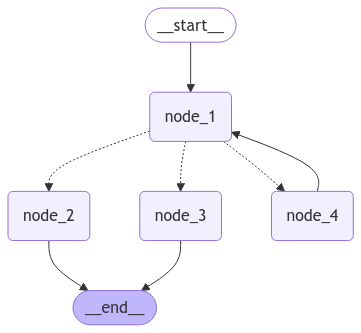

In [200]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [202]:
graph.invoke({"graph_state" : "Hi, this is Lance."})

--Node 1--
--Decision Node--
--Node 2--


{'graph_state': 'Bilal is happy.', 'node_ran': [1, 2], 't': ['a', 'b']}